<a href="https://colab.research.google.com/github/hariansyahputra/intro-github/blob/main/Tesseract-OCR%20Detection%20ID%20Card%20(KTP).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount =True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AY0e-g7AWj14lLAYf1tUTzaEKM0Cl678sM37HetU7HnP_nBiiHm_yuDqLJU
Mounted at /content/drive


In [3]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!sudo apt-get install tesseract-ocr-ind

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 39 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 2s (3,031 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

In [4]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

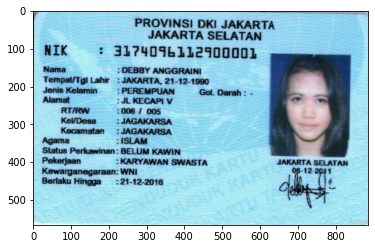

In [8]:
# (1) read
img = cv2.imread("/content/drive/MyDrive/DATASET KTP/DEBBY.jpg")


real_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(real_img)

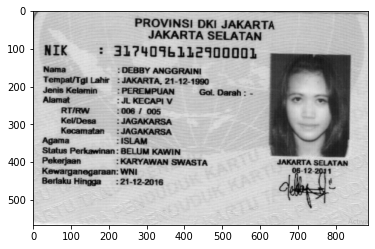

In [10]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img,cmap ='gray')

In [12]:
#  (2) treshold
th, threshed = cv2.threshold(real_img, 127, 255, cv2.THRESH_TRUNC)

In [13]:
# (3) Detect
result = pytesseract.image_to_string((threshed), lang="ind")

In [14]:
result

'PROVINSI DKI JAKARTA\nJAKARTA SELATAN\n\nNIK 1 31?40965112400001\n\nNama : DEBBY ANGGRAINI\nTempat/Tgi Lahir : JAKARTA, 21-12-1990\nJenis Kelamin : PEREMPUAN Gol. Darah : -\n\nAlamat 2 JL KECAPI V\nRT/RW 1006 / 005\nKel/Desa 1 JAGAKARSA p\nKecamatan : JAGAKARSA\n\nAgama 1 ISLAM\n\nStatus Perkawinan: BELUM KAWIN\n\nPekerjaan : KARYAWAN SWASTA JAKARTA SELATAN\n\nKewarganegaraan: WNI 1\nBerlaku Hingga :21-12-2016 d\n|\n\x0c'

In [15]:
## (5) Normalize
for word in result.split("\n"):
  if "”—" in word:
    word = word.replace("”—", ":")
  
  #normalize NIK
  if "NIK" in word:
    nik_char = word.split()
    if "D" in word:
      word = word.replace("D", "0")
    if "?" in word:
      word = word.replace("?", "7") 
  
  print(word)

PROVINSI DKI JAKARTA
JAKARTA SELATAN

NIK 1 31740965112400001

Nama : DEBBY ANGGRAINI
Tempat/Tgi Lahir : JAKARTA, 21-12-1990
Jenis Kelamin : PEREMPUAN Gol. Darah : -

Alamat 2 JL KECAPI V
RT/RW 1006 / 005
Kel/Desa 1 JAGAKARSA p
Kecamatan : JAGAKARSA

Agama 1 ISLAM

Status Perkawinan: BELUM KAWIN

Pekerjaan : KARYAWAN SWASTA JAKARTA SELATAN

Kewarganegaraan: WNI 1
Berlaku Hingga :21-12-2016 d
|

